# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = (city_weather["coord"]["lat"])
        city_lng = (city_weather["coord"]["lon"])
        city_max_temp = (city_weather["main"]["temp_max"])
        city_humidity = (city_weather["main"]["humidity"])
        city_clouds = (city_weather["clouds"]["all"])
        city_wind = (city_weather["wind"]["speed"])
        city_country = (city_weather["sys"]["country"])
        city_date = (city_weather["dt"])

        # Append the City information into city_data list
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except KeyError:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | north shore
Processing Record 2 of Set 1 | datong
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | papatowai
Processing Record 5 of Set 1 | blackmans bay
Processing Record 6 of Set 1 | yuzhno-kurilsk
Processing Record 7 of Set 1 | acapulco de juarez
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | big lake
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | whakatane
Processing Record 12 of Set 1 | west island
Processing Record 13 of Set 1 | invercargill
Processing Record 14 of Set 1 | bekovo
Processing Record 15 of Set 1 | port-aux-francais
Processing Record 16 of Set 1 | kapuskasing
Processing Record 17 of Set 1 | bilibino
Processing Record 18 of Set 1 | obihiro
Processing Record 19 of Set 1 | ambovombe
Processing Record 20 of Set 1 | sitka
Processing Record 21 of Set 1 | taroa
Processing Record 22 of Set 1 | fomboni
Processi

Processing Record 42 of Set 4 | chissamba
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | lyantonde
Processing Record 45 of Set 4 | badger
Processing Record 46 of Set 4 | balkanabat
Processing Record 47 of Set 4 | moranbah
Processing Record 48 of Set 4 | guiuan
Processing Record 49 of Set 4 | aq qayeh
City not found. Skipping...
Processing Record 0 of Set 5 | san luis de la loma
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | betio village
Processing Record 3 of Set 5 | hastings
Processing Record 4 of Set 5 | utrik
Processing Record 5 of Set 5 | pandan
Processing Record 6 of Set 5 | namibe
Processing Record 7 of Set 5 | kudahuvadhoo
Processing Record 8 of Set 5 | georgetown
Processing Record 9 of Set 5 | antigonish
Processing Record 10 of Set 5 | fuvahmulah
City not found. Skipping...
Processing Record 11 of Set 5 | siwa oasis
Processing Record 12 of Set 5 | am djarass
City not found. Skipping...
Processing Record 13 of Set 5 | ule

Processing Record 36 of Set 8 | fort mcmurray
Processing Record 37 of Set 8 | cusseta
Processing Record 38 of Set 8 | kununurra
Processing Record 39 of Set 8 | nar'yan-mar
Processing Record 40 of Set 8 | masons bay
City not found. Skipping...
Processing Record 41 of Set 8 | malkara
Processing Record 42 of Set 8 | nuku'alofa
Processing Record 43 of Set 8 | noyabrsk
Processing Record 44 of Set 8 | guerrero negro
Processing Record 45 of Set 8 | la ronge
Processing Record 46 of Set 8 | broken hill
Processing Record 47 of Set 8 | menongue
Processing Record 48 of Set 8 | whitehorse
Processing Record 49 of Set 8 | tranovaho
City not found. Skipping...
Processing Record 0 of Set 9 | maun
Processing Record 1 of Set 9 | alice springs
Processing Record 2 of Set 9 | chyorny yar
Processing Record 3 of Set 9 | petropavlovsk-kamchatsky
Processing Record 4 of Set 9 | tsiombe
Processing Record 5 of Set 9 | miquelon
Processing Record 6 of Set 9 | hell-ville
Processing Record 7 of Set 9 | nizao
Processin

Processing Record 25 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 26 of Set 12 | llallagua
Processing Record 27 of Set 12 | pimenta bueno
Processing Record 28 of Set 12 | kosh-agach
Processing Record 29 of Set 12 | wamba
Processing Record 30 of Set 12 | el abiodh sidi cheikh
Processing Record 31 of Set 12 | tamiahua
Processing Record 32 of Set 12 | jiaojiang
Processing Record 33 of Set 12 | tonghae
Processing Record 34 of Set 12 | pangody
Processing Record 35 of Set 12 | cassilandia
Processing Record 36 of Set 12 | verkhnevilyuysk
Processing Record 37 of Set 12 | yarmouth
Processing Record 38 of Set 12 | kez
Processing Record 39 of Set 12 | corumba
Processing Record 40 of Set 12 | lerwick
Processing Record 41 of Set 12 | bokhan
Processing Record 42 of Set 12 | happy valley-goose bay
Processing Record 43 of Set 12 | marsa alam
Processing Record 44 of Set 12 | pacific grove
Processing Record 45 of Set 12 | goundam
Processing Record 46 of Set 12 | gusinoozyorsk
Pro

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
# Show Record Count
city_data_df.count()

City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,North Shore,-36.8000,174.7500,65.39,67,100,8.99,NZ,1682635855
1,Datong,40.0936,113.2914,48.51,55,37,6.82,CN,1682635855
2,Grytviken,-54.2811,-36.5092,36.28,83,44,7.92,GS,1682635855
3,Papatowai,-46.5619,169.4708,55.47,76,7,2.28,NZ,1682635856
4,Blackmans Bay,-43.0167,147.3167,64.53,85,24,9.69,AU,1682635856


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,North Shore,-36.8000,174.7500,65.39,67,100,8.99,NZ,1682635855
1,Datong,40.0936,113.2914,48.51,55,37,6.82,CN,1682635855
2,Grytviken,-54.2811,-36.5092,36.28,83,44,7.92,GS,1682635855
3,Papatowai,-46.5619,169.4708,55.47,76,7,2.28,NZ,1682635856
4,Blackmans Bay,-43.0167,147.3167,64.53,85,24,9.69,AU,1682635856


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

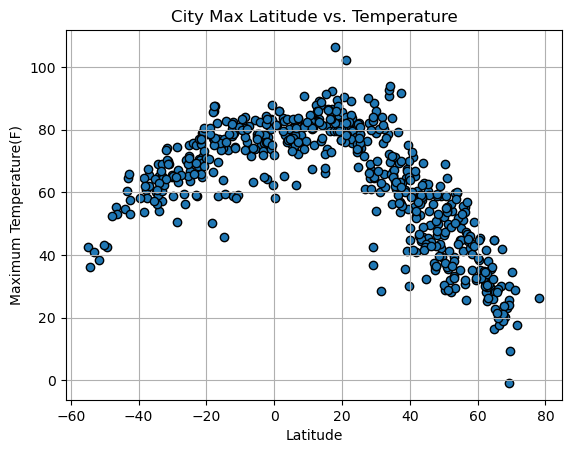

In [11]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df['Lat']
y_axis = city_data_df['Max Temp']
plt.scatter(x_axis, y_axis, edgecolor="black")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature(F)")
plt.title("City Max Latitude vs. Temperature")
# Incorporate the other graph properties
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

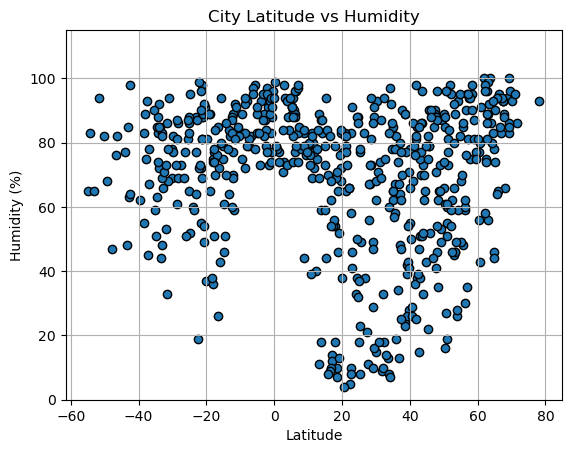

In [12]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df['Lat']
y_axis = city_data_df['Humidity']
plt.scatter(x_axis, y_axis, edgecolor="black")

# Incorporate the other graph properties
plt.title('City Latitude vs Humidity')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.ylim(0, 115)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

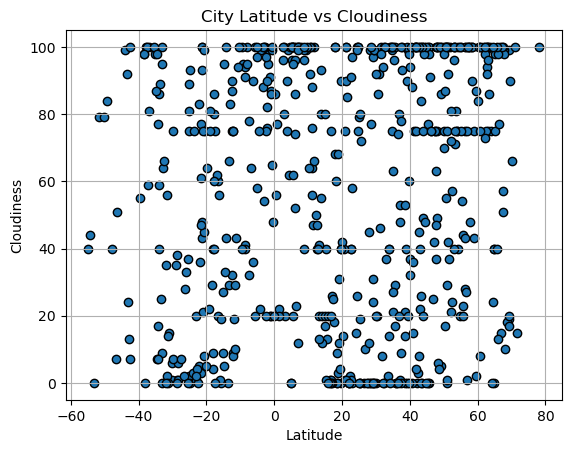

In [13]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, edgecolor="black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

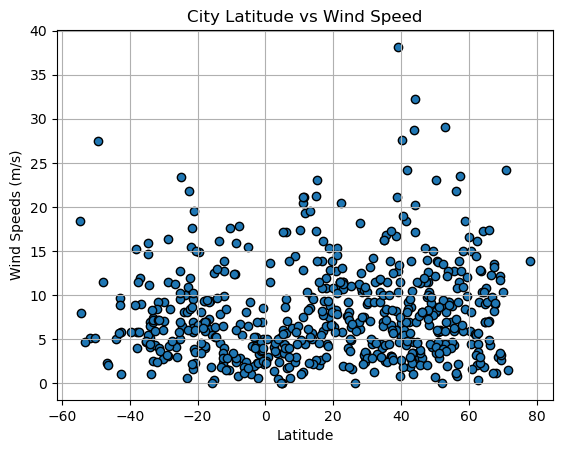

In [14]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, edgecolor = "black")

# Incorporate the other graph properties
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speeds (m/s)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def createLinearRegressionPlot(x_values, y_values, x_label, y_label, hemisphere, line_placement, ylim=None):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Get regression values
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if ylim is not None:
        plt.ylim(0, ylim)
    plt.title(f"{hemisphere} Hemisphere - {x_label} vs {y_label}")
    plt.annotate(line_eq,line_placement,fontsize=15,color="red")
    # Print r square value
    print(f"The r-squared is: {rvalue**2}")
    correlation = st.pearsonr(x_values,y_values)
    print(f"The correlation between both factors is {round(correlation[0],2)}")
    plt.savefig(f"./output_data/{hemisphere}_{x_label}_vs_{y_label}.png", bbox_inches="tight")
    return plt.plot(x_values,regress_values,"r-")

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"]>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,Datong,40.0936,113.2914,48.51,55,37,6.82,CN,1682635855
5,Yuzhno-Kurilsk,44.0306,145.8556,45.73,73,49,20.22,RU,1682635856
6,Acapulco De Juarez,16.8634,-99.8901,85.82,62,75,13.80,MX,1682635821
8,Big Lake,45.3325,-93.7461,60.58,82,100,2.98,US,1682635856
13,Bekovo,52.4663,43.7120,54.00,62,57,4.27,RU,1682635857


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,North Shore,-36.8000,174.7500,65.39,67,100,8.99,NZ,1682635855
2,Grytviken,-54.2811,-36.5092,36.28,83,44,7.92,GS,1682635855
3,Papatowai,-46.5619,169.4708,55.47,76,7,2.28,NZ,1682635856
4,Blackmans Bay,-43.0167,147.3167,64.53,85,24,9.69,AU,1682635856
7,Adamstown,-25.0660,-130.1015,74.97,65,89,4.97,PN,1682635856


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7334490912435221
The correlation between both factors is -0.86


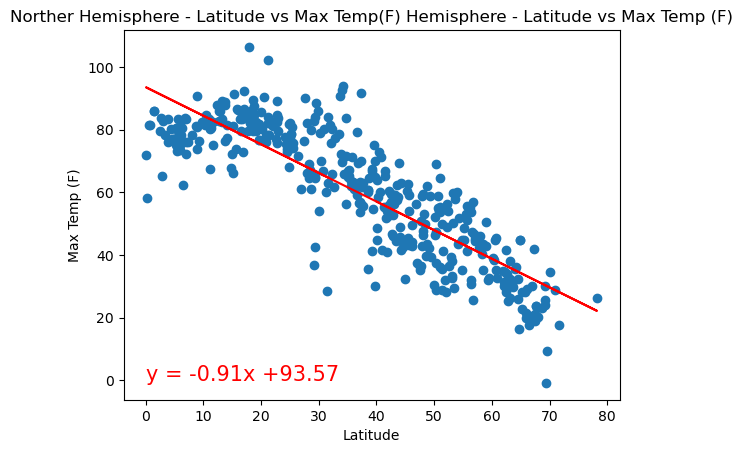

In [18]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Max Temp (F)", "Norther Hemisphere - Latitude vs Max Temp(F)", (0,0))

The r-squared is: 0.5278585112443908
The correlation between both factors is 0.73


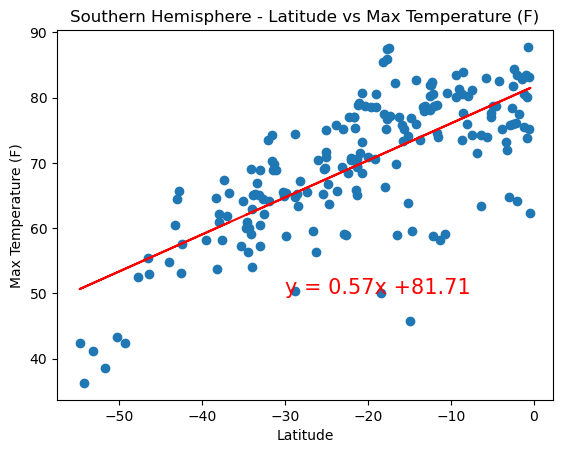

In [19]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Max Temp']
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Max Temperature (F)", "Southern", (-30,50))

**Discussion about the linear relationship:
Looking at both of these graphs, you can see that closer to the equator the cities are, the higher the maximum temperature recorded. The further away from the equator the cities are, the lower the maximum tempterature recorded is. The linear equation shows that by the x number either being negative or positive. In the northern hemisphere graph, the x coefficient is negative to show getting further away from the equator while in the southern hemisphere graph, the x coefficient is positive to show getting closer to the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.011063580440936124
The correlation between both factors is 0.11


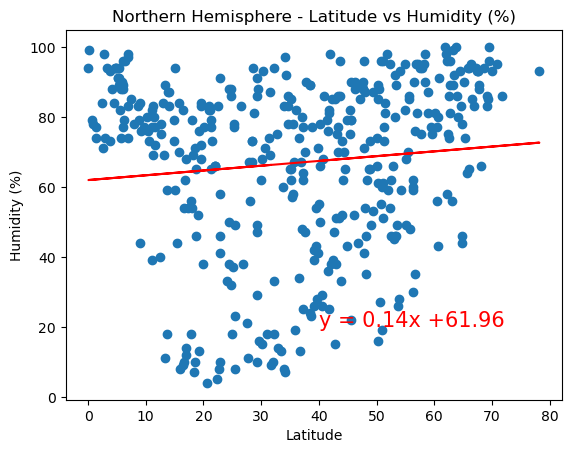

In [20]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Humidity (%)", "Northern",(40, 20))

The r-squared is: 0.06928369690758863
The correlation between both factors is 0.26


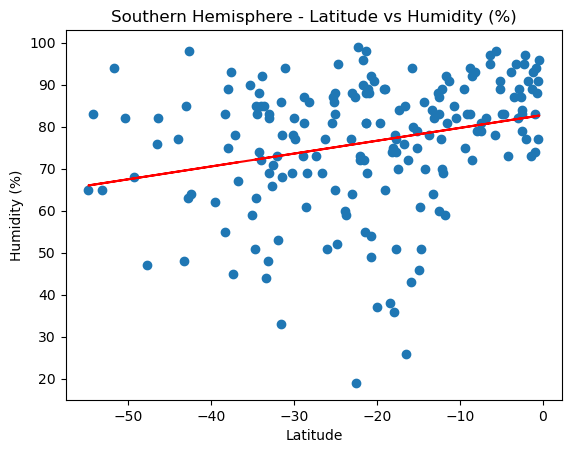

In [21]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Humidity (%)", "Southern",(40, 20))

With the scatter plot for humidity by the different hemispheres, you can see that in the northern hemisphere there is more variation and shows that the closer to the equator you are the more variable the humidity. Additionally the further you are from the equator, the humidity stays above ~30% for both the northern and southern hemispheres. In the northern hemisphere there is a positive correlation between humidity and latitude closer to 0. However, the southern hemisphere has no clear correlation between latitude location and humidity levels. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.015082044807737383
The correlation between both factors is 0.12


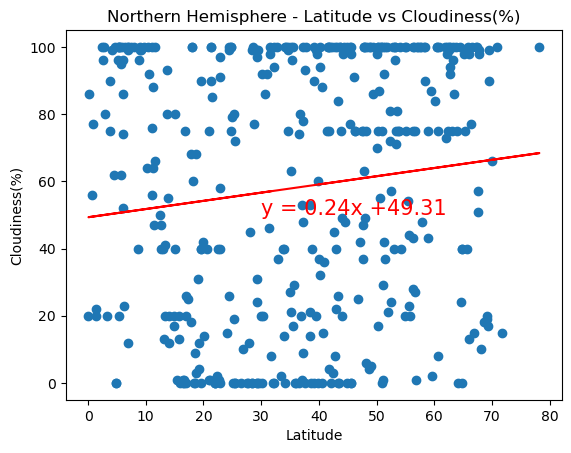

In [22]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Cloudiness(%)", "Northern", (30, 50))

The r-squared is: 0.036048901185050754
The correlation between both factors is 0.19


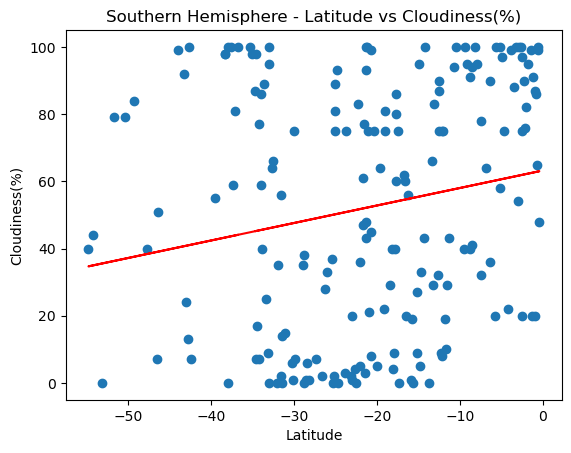

In [23]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Cloudiness']
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Cloudiness(%)", "Southern",(30, 50))

Looking at the two graphs for cloudiness for the two hemispheres, there isn't a strong correlation between the two variables. As we get closer to the equator, both the northern and southern hemispheres have more clouds and as you get further away, the less clouds were reported. That is more clear in the southern hemisphere graph than it is the northern hemisphere.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.005517542271757507
The correlation between both factors is 0.07


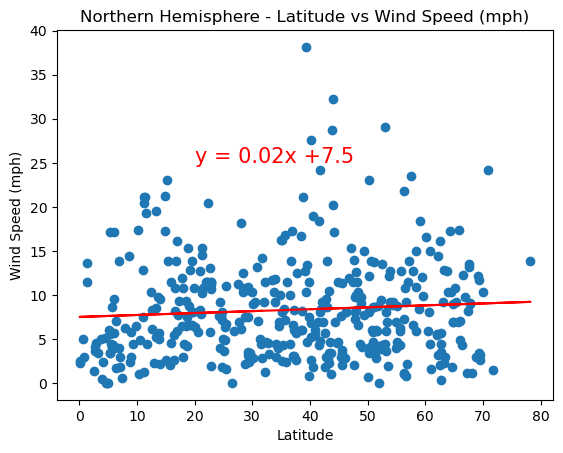

In [24]:
# Northern Hemisphere
x_axis = northern_hemi_df['Lat']
y_axis = northern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Wind Speed (mph)", "Northern",(20, 25))

The r-squared is: 0.04117142645445612
The correlation between both factors is -0.2


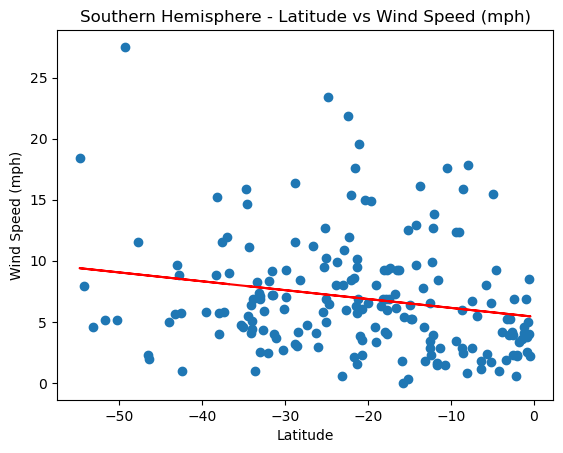

In [25]:
# Southern Hemisphere
x_axis = southern_hemi_df['Lat']
y_axis = southern_hemi_df['Wind Speed']
createLinearRegressionPlot(x_axis, y_axis, "Latitude", "Wind Speed (mph)", "Southern",(20, 25))

In the southern hemisphere, the graphs show that there was lower wind speeds recorded if you're closer to the equator. That is shown by the negative coefficient in the equation. However, there isn't a clear relationship shown between wind speeds and latitude in the northern hemisphere. Throughout the northern hemisphere cities that were looked at for this project, most of the cities reported similar wind speeds. 